# 8주차 텍스트 마이닝 실습 1    

# KoreanClassify: 한글 문서의 분류  
다음무비(http://movie.daum.net) 로부터 crawl한 영화리뷰를 이용하여 분류 연습  
영화리뷰와 영화의 제목을 학습해서 주어진 리뷰내용으로 어떤 영화에 대한 리뷰인지를 예측하고자 함  

## Data file  
'신과함께', '코코', '라라랜드', '인피니티 워', '곤지암' 다섯개의 영화에 대해 총 1827개의 리뷰를 수집 csv 파일 안에 리뷰내용, 평점, 영화이름 의 순으로 저장되어 있음


In [1]:
import csv

text = []
y = []
with open('C:/Users/mky06/Documents/movie_data.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [2]:
print('Num of samples: {}'.format(len(text)))
print('Movie titles of reivews: {}'.format(set(y)))

Num of samples: 1827
Movie titles of reivews: {'인피니티 워', '신과함께', '라라랜드', '코코', '곤지암'}


In [3]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(text, y, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨

In [4]:
len(X_train) #1827의 0.75

1370

In [5]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import. +) Hannanum: KAIST 말뭉치, Kkma: 세종 말뭉치, Mecab: 세종 말뭉치(csv), Komoran: Java 오픈소스
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()
#twitter_tag = Twitter()

In [6]:
print(twitter_tag.morphs(X_train[1])) #형태소 분석 

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [7]:
twitter_tag.nouns(X_train[1]) #둘째 리뷰에서 명사만 추출

['혹시', '역시', '편집', '사운드', '공포', '영화', '푸시', '인상', '여기', '또']

In [8]:
def twit_tokenizer(text): # Twitter 형태소 분석기의 명사추출함수를 tokenizer 함수로 사용
    return twitter_tag.nouns(text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=2) #Twitter 형태소분석기에서 명사만 추출하는 함수를 tokenizer로 이용
# twit_tokenizer 대신 twitter_tag.nouns를 직접 써도 됨
# 하나의 문서에서만 출현한 단어는 쓸모가 없으므로 제외, 즉 최소 document frequency를 2로 설정

X_train_tfidf = tfidf.fit_transform(X_train) # train data 변환 -> tfidf vector
X_test_tfidf = tfidf.transform(X_test) # test data 변환 -> tfidf vector

clf = LogisticRegression() # logistic regression 분류기 선언
clf.fit(X_train_tfidf, y_train) # 분류기 학습
print('Train score', clf.score(X_train_tfidf, y_train)) # train data 예측정확도: 0.84
print('Test score', clf.score(X_test_tfidf, y_test)) # test data 예측정확도: 0.67
print(X_train_tfidf.shape) # 총 1156개의 명사로 이루어짐

Train score 0.8364963503649635
Test score 0.6717724288840262
(1370, 1156)


In [10]:
X_test[:10] #test data에서 앞 10개를 출력

['졸잼 최고',
 '내용, 음악 , 연기력  무엇하나 빠지는것이 없네요 특히 음악은 계속 찾아 듣게되요^^',
 '아맥2D로 느즈막히 관람.... 히어로가 많이나오지만, 이걸 꽤나 잘 버무려놓음. 뻔한스토리의 틀을 벗어나려 노력한점은 높은점수를 줄만함.... 블럭버스터액션, 영상미는 말이필요없음...... 후속편 기대됨!',
 '후반부터 쫄렸다.',
 '진짜. 솔직히 한국 공포영화중에 이렇게 소재별로인건 정말 오랜만인듯; 지들끼리 소리지르고 정신없이 우왕자왕 심지어 무섭지도않어 효과음만크고 진짜최악임ㅉㅉ',
 '소문난 잔치에 먹을거 없음..ㅜㅜ',
 'good!',
 '아 점수를 줄 수가 없네  화면은 왜그리도 흔들어 데는지........ 재미도 없고 가볍기만하고 .... 최악의 재미없는 배멀미 영화',
 '영화 보면서 펑펑물었네요~ 부모님 사랑에 대해 다시한번 생각하게 했던 영화네요^ ^',
 '슬픈 스토리지만 삶을 돌아보게 하는 영화다. 죄를 지은자는 그 벌을 고스란히 받으리라. 사회 각종범죄자들 뉘우치길 바란다.']

In [11]:
clf.predict(X_test_tfidf[:10]) # test data의 앞 10개에 대한 예측내용

array(['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워',
       '신과함께', '코코', '신과함께'], dtype='<U6')

In [12]:
print(y_test[:10]) # test data 앞 10개의 실제 영화제목

['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워', '곤지암', '신과함께', '신과함께']


## 성능을 개선하기 위한 노력

In [13]:
# morphs()는 명사 외에도 모든 형태소를 포함
print(twitter_tag.morphs(X_train[1]))

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [14]:
tfidf = TfidfVectorizer(tokenizer=twitter_tag.morphs, min_df=2) # 명사 대신 모든 형태소를 사용
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train)) # 0.90
print('Test score', clf.score(X_test_tfidf, y_test)) # 0.65
print(X_train_tfidf.shape)
#명사만 사용한 것에 비해 train score는 상승, test score는 하락

Train score 0.897080291970803
Test score 0.6520787746170679
(1370, 2259)


In [15]:
print(twitter_tag.pos(X_train[1], norm=True, stem=True)) #pos()는 형태소와 품사를 함께 제공

[('혹시', 'Noun'), ('나', 'Josa'), ('하다', 'Verb'), ('보다', 'Verb'), ('역시', 'Noun'), ('나다', 'Verb'), (';;', 'Punctuation'), ('편집', 'Noun'), ('과', 'Josa'), ('사운드', 'Noun'), ('로', 'Josa'), ('주다', 'Verb'), ('작다', 'Adjective'), ('공포', 'Noun'), ('영화', 'Noun'), ("'", 'Punctuation'), ('푸시', 'Noun'), ("'", 'Punctuation'), ('에서', 'Josa'), ('인상', 'Noun'), ('깊다', 'Adjective'), ('보다', 'Verb'), ('여기', 'Noun'), ('서', 'Josa'), ('또', 'Noun'), ('보다', 'Verb'), (';;', 'Punctuation')]


In [16]:
def twit_tokenizer2(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
#            result.append('/'.join([word, tag]))
    return result

In [17]:
print(twit_tokenizer2(X_train[1])) # 사용 예

['혹시', '하다', '보다', '역시', '나다', '편집', '사운드', '주다', '작다', '공포', '영화', '푸시', '인상', '깊다', '보다', '여기', '또', '보다']


In [18]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer2, min_df=2) #명사, 동사, 형용사를 이용하여 tfidf 생성
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train)) # 0.87
print('Test score', clf.score(X_test_tfidf, y_test)) # 0.68
print(X_train_tfidf.shape)
# 현재까지 중에서 test score가 가장 뛰어남

Train score 0.8715328467153285
Test score 0.6849015317286652
(1370, 1584)


In [19]:
# 모든 형태소를 다 사용하고 품사를 알 수 있도록 하면?
def twit_tokenizer3(text):
    #target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        result.append('/'.join([word, tag])) #단어의 품사를 구분할 수 있도록 함
    return result

In [20]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer3, min_df=2)
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train)) # 0.89
print('Test score', clf.score(X_test_tfidf, y_test)) # 0.68
print(X_train_tfidf.shape)
# train은 올라가고, test는 유지

Train score 0.8934306569343066
Test score 0.6805251641137856
(1370, 2022)


In [21]:
# train score가 높으므로 ridge를 쓰면 어떨까?
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha = 1)
ridge_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train))) # 0.95
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test))) # 0.68 
# train score가 올라가는 현상이 벌어짐

Train set score: 0.945
Test set score: 0.678


In [22]:
#lasso를 쓰면?
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear')
lasso_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train))) # 0.72
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test))) # 0.64
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

Train set score: 0.718
Test set score: 0.641
Used features count: 240 out of 2022


In [23]:
#lsa를 쓰면?
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=239, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_train_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_) 
print(svd.components_.shape)

[0.01097394 0.01404418 0.01144555 0.01099639 0.00916745 0.00875989
 0.00835936 0.00794889 0.00777951 0.00738573 0.00715576 0.00666331
 0.00659225 0.00618775 0.00592882 0.00582323 0.0056259  0.00542605
 0.00525103 0.00523123 0.00520221 0.00506956 0.00494388 0.00479853
 0.00469988 0.00459151 0.00458951 0.00452605 0.00436703 0.00430513
 0.00425153 0.00416082 0.00409785 0.00402263 0.00399375 0.00395814
 0.00392284 0.00387447 0.00373225 0.0037107  0.00365221 0.00363015
 0.00358802 0.00353893 0.0035093  0.00346765 0.00340709 0.00336875
 0.00333267 0.00330703 0.00323153 0.00321719 0.00315377 0.0031451
 0.00309437 0.00308121 0.00306176 0.00301699 0.00299564 0.0029579
 0.00293779 0.00290843 0.00288642 0.00288784 0.00286235 0.00283992
 0.00279693 0.00276647 0.00274554 0.00271376 0.00268972 0.00266628
 0.00264023 0.0026273  0.00261976 0.00258926 0.00260291 0.00256814
 0.00255141 0.00253006 0.0025199  0.00251091 0.00249142 0.0024794
 0.00245132 0.00243894 0.00241102 0.00239672 0.00238019 0.0023712

In [24]:
X_train_svd = svd.transform(X_train_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)
X_test_svd = svd.transform(X_test_tfidf)

from sklearn.linear_model import LogisticRegression
SVD_clf = LogisticRegression()
SVD_clf.fit(X_train_svd, y_train)
print('Train set score: {:.3f}'.format(SVD_clf.score(X_train_svd, y_train))) # 0.77
print('Test set score: {:.3f}'.format(SVD_clf.score(X_test_svd, y_test))) # 0.66

Train set score: 0.770
Test set score: 0.659


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=twit_tokenizer2, min_df=2).fit(X_train) #tfidf와 동일하게 max_feature를 제한하여 학습
X_train_cv = cv.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) # 36310 대신 2000이 된 것을 확인
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(X_train_cv, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) # 0.80
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) # 0.69

C:\Users\mky06\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train set dimension: (1370, 1584)
Test set dimension: (457, 1584)
Train set score: 0.801
Test set score: 0.685


---
# 9주차 텍스트 마이닝 실습 2  
# TopicTrendMovie


In [26]:
import matplotlib
%matplotlib inline
import pandas as pd

In [27]:
data = pd.read_csv("C:/Users/mky06/Documents/movie_data_include_date.csv", header=None, names=['review', 'rate', 'date', 'title']) #read data

In [28]:
for ix, name in enumerate(data.columns):
    print(ix,name)

0 review
1 rate
2 date
3 title


In [29]:
data.head() # 데이터 학인

,review,rate,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [30]:
data.review.shape
type(data.review)

pandas.core.series.Series

In [31]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기(okt)를 import
twitter_tag = Okt()

def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1] # token 길이 > 1

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(data.review)

In [33]:
review_cv.shape

(14725, 1000)

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [35]:
print(review_topics.shape)
type(review_topics)

(14725, 10)


numpy.ndarray

In [36]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [37]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 마지막, 기대, 내용, 마블, 스토리, 부분, 하나, 노스, 조금, 다음
Topic #1: 감동, 최고, 가족, 음악, 인생, 사랑, 마음, 영화, 현실, 우리나라
Topic #2: 연기, 배우, 재미, 감동, 송강호, 역시, 별로, 작품, 내내, 김동욱
Topic #3: 영화, 원작, 웹툰, 이야기, 대한, 다른, 모든, 주인공, 영화로, 아주
Topic #4: 시간, 그냥, 평점, 수준, 관객, 영화, 천만, 이상, 최악, 이건
Topic #5: 생각, 진짜, 눈물, 보고, 신파, 다시, 한번, 아이, 억지, 엄마
Topic #6: 스토리, 장면, 중간, 공포영화, 공포, 추천, 보기, 한국영, 대박, 소재
Topic #7: 영화, 사람, 정도, 감독, 한국, 완전, 이영화, 인간, 지옥, 판타지
Topic #8: 정말, 느낌, 처음, 액션, 차태현, 연출, 몰입, 연기력, 조연, 초반
Topic #9: 마동석, 광주, 윤계상, 역사, 가슴, 우리, 택시, 지금, 시민, 국민



In [38]:
trend_data = pd.DataFrame(review_topics, columns=['topic'+str(i) for i in range(1, 11)])

In [39]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
0,0.165371,0.083333,0.166597,0.083333,0.083333,0.083333,0.084628,0.083333,0.083333,0.083404
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333
2,0.235403,0.063470,0.228465,0.058863,0.058824,0.058824,0.059820,0.058824,0.116671,0.060839
3,0.091232,0.090909,0.090909,0.090909,0.098539,0.091509,0.092369,0.166402,0.096314,0.090909
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [40]:
trend_data = pd.concat([trend_data, data.date], axis=1)

In [41]:
trend_data.shape

(14725, 11)

In [42]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,date
0,0.165371,0.083333,0.166597,0.083333,0.083333,0.083333,0.084628,0.083333,0.083333,0.083404,2018.10.29
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333,2018.10.26
2,0.235403,0.063470,0.228465,0.058863,0.058824,0.058824,0.059820,0.058824,0.116671,0.060839,2018.10.24
3,0.091232,0.090909,0.090909,0.090909,0.098539,0.091509,0.092369,0.166402,0.096314,0.090909,2018.10.22
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,2018.10.20


In [43]:
trend = trend_data.groupby(['date']).mean()

In [44]:
trend.shape

(640, 10)

In [45]:
trend.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
date,,,,,,,,,,
2016.04.27,0.235321,0.059892,0.058934,0.107534,0.059967,0.118223,0.058976,0.065519,0.117942,0.117693
2016.05.09,0.097450,0.098989,0.083607,0.168341,0.084568,0.099190,0.073326,0.084062,0.132984,0.077484
2016.05.20,0.159960,0.062500,0.125214,0.188320,0.063189,0.124889,0.087894,0.062500,0.063035,0.062500
2016.06.04,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.250000,0.083333
2016.07.09,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [46]:
len(set(trend_data.date))

640

In [47]:
#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

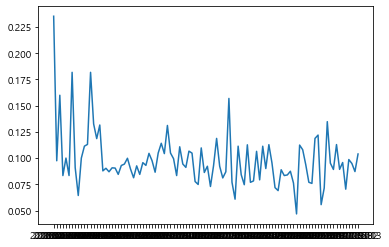

In [48]:
plt.plot(trend.index[:100], trend.topic1[:100])
plt.show()